<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20705 entries, 0 to 20704
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT_TYPE       20705 non-null  object 
 1   DISTRICT_NAME       20705 non-null  object 
 2   DISTRICT_CODE       17960 non-null  float64
 3   ACADEMIC_YEAR       20705 non-null  object 
 4   DEMO_CATEGORY       20705 non-null  object 
 5   STUDENT_POPULATION  20705 non-null  object 
 6   AWARD_CATEGORY      20705 non-null  object 
 7   WAGE_YEAR1          20705 non-null  float64
 8   WAGE_YEAR2          20705 non-null  float64
 9   WAGE_YEAR3          20705 non-null  float64
 10  WAGE_YEAR4          20705 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB
None
DISTRICT_TYPE            0
DISTRICT_NAME            0
DISTRICT_CODE         2745
ACADEMIC_YEAR            0
DEMO_CATEGORY            0
STUDENT_POPULATION       0
AWARD_CATEGORY           0
WAGE_YEA

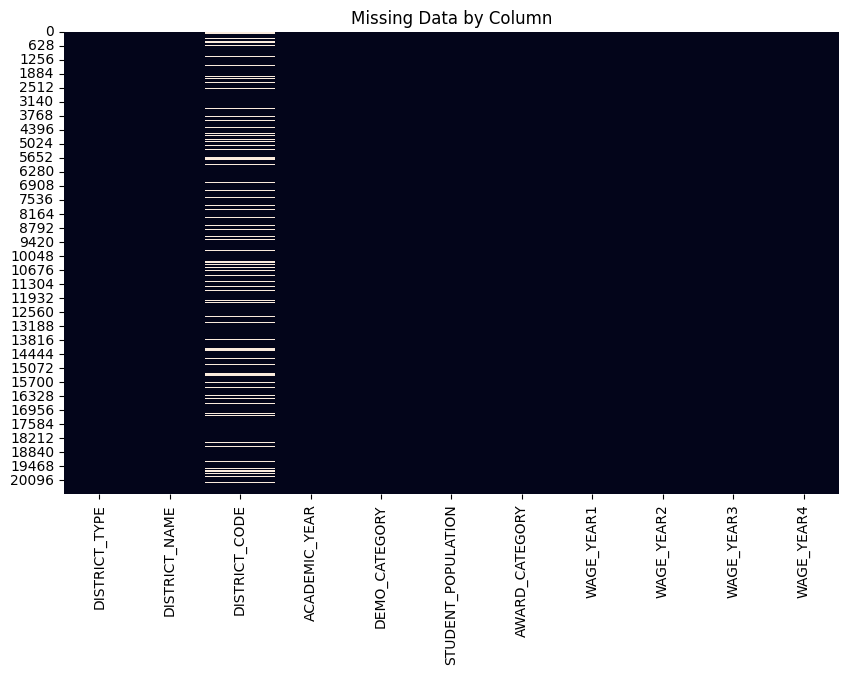

In [5]:
#Part 1 Data quality
import pandas as pd

df = pd.read_csv("earnings_train.csv")

# Data types and counts
print(df.info())

# Missing data summary
print(df.isnull().sum())

# Chart of missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data by Column")
plt.show()



DISTRICT_TYPE unique values:
['School District' 'Legislative District' 'All']

DISTRICT_NAME unique values:
['Duarte Unified' 'Coronado Unified' 'Gilroy Unified' 'Pleasant Valley'
 'Senate District 15' 'Adelanto Elementary' 'Assembly District 56'
 'Klamath-Trinity Joint Unified' 'Modoc Joint Unified'
 'Healdsburg Unified']

ACADEMIC_YEAR unique values:
['2018-2019']

DEMO_CATEGORY unique values:
['Race' 'Homeless Status' 'All' 'Foster Status' 'Gender']

STUDENT_POPULATION unique values:
['None Reported' 'Black or African American'
 'Did Not Experience Homelessness in K-12'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' 'All' 'Two or More Races'
 'Foster Youth' 'Female' 'White']

AWARD_CATEGORY unique values:
["Bachelor's Degree - Did Not Transfer" 'Associate Degree'
 'Community College Certificate' "Bachelor's Degree - Transferred"]
       DISTRICT_CODE    WAGE_YEAR1     WAGE_YEAR2     WAGE_YEAR3  \
count   1.796000e+04  20705.000000   20705.000000   

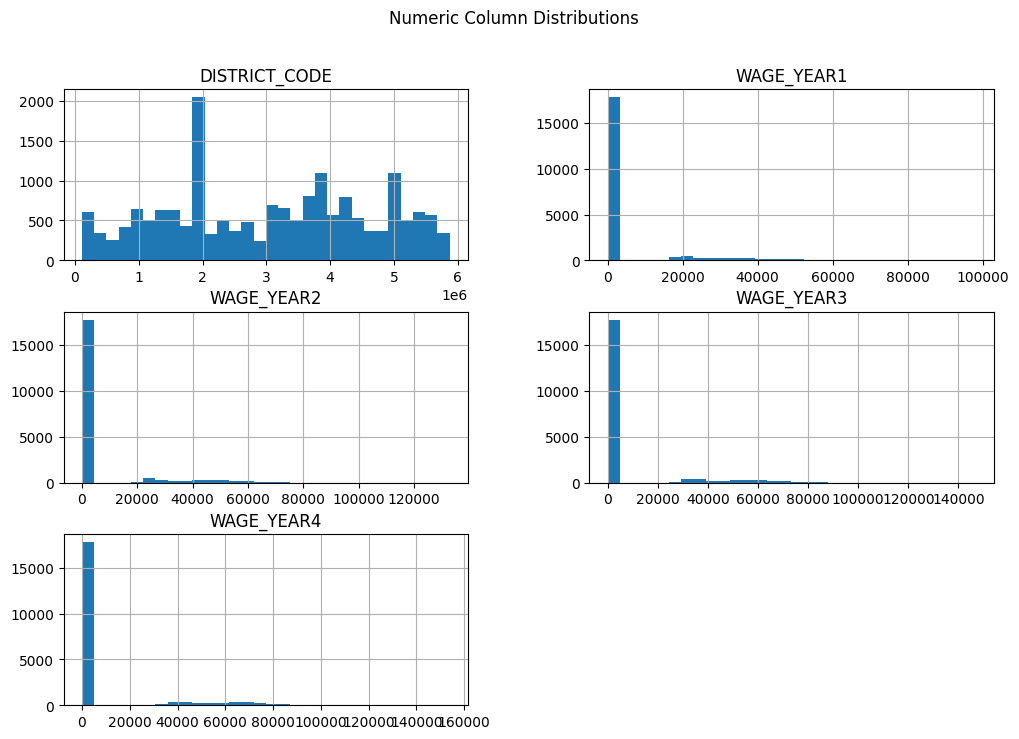

In [6]:
# Part 1 Range
# Unique values for categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col} unique values:")
    #show first 10 unique values
    print(df[col].unique()[:10]) 

# Range and summary of numeric columns
print(df.describe())

# Plot numeric distributions in histograms
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numeric Column Distributions")
plt.show()


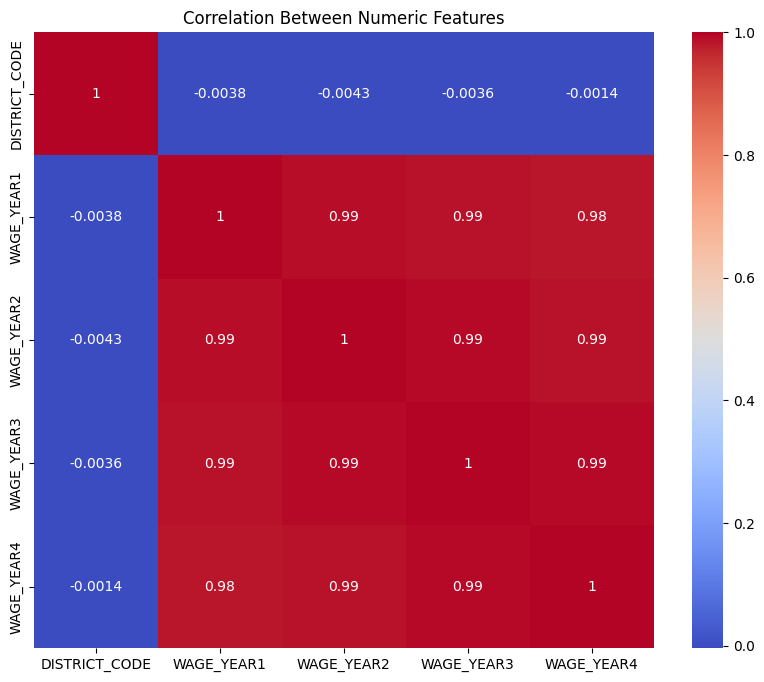

                        count          mean           std      min      25%  \
DISTRICT_TYPE                                                                 
All                      43.0  56684.395349  13827.677370  36895.0  44473.5   
Legislative District   2702.0  32318.767209  31798.921487      0.0      0.0   
School District       17960.0   4836.823385  17508.330618      0.0      0.0   

                          50%      75%       max  
DISTRICT_TYPE                                     
All                   57552.0  66909.5   85761.0  
Legislative District  38330.5  61111.0  125524.0  
School District           0.0      0.0  153910.0  
                                       count          mean           std  min  \
AWARD_CATEGORY                                                                  
Associate Degree                      4695.0   8928.751012  17740.451983  0.0   
Bachelor's Degree - Did Not Transfer  5220.0  19017.450383  33011.113396  0.0   
Bachelor's Degree - Trans

In [10]:
#Part 1 Semantics

# Correlation heatmap for numeric columns only. (District code and wage years)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()

#Categorical vs Numeric
print(df.groupby('DISTRICT_TYPE')['WAGE_YEAR4'].describe())
print(df.groupby('AWARD_CATEGORY')['WAGE_YEAR4'].describe())

In [23]:
#Part 2 Linear Regression Model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read training data
df = pd.read_csv('earnings_train.csv')

# Fill in missing district code values
df['DISTRICT_CODE'] = df['DISTRICT_CODE'].fillna("Unknown")

# Separate features and target
X = df.drop(columns=['WAGE_YEAR4'])
y = df['WAGE_YEAR4']

# Convert categorical text data to numbers
X = pd.get_dummies(X, drop_first=True)

# Train the model on all training data
model = LinearRegression()
model.fit(X, y)

# Read test data
test_features = pd.read_csv("earnings_test_features.csv")
test_features['DISTRICT_CODE'] = test_features['DISTRICT_CODE'].fillna("Unknown")
test_features = pd.get_dummies(test_features, drop_first=True)

# Make sure test columns match training columns
test_features = test_features.reindex(columns=X.columns, fill_value=0)

# Predict Wage 4
preds = model.predict(test_features)

#Get rid of negative wages
preds = np.maximum(preds, 0)


# Save predictions
pd.DataFrame(preds, columns=['WAGE_YEAR4']).to_csv("preds.csv", index=False)

#Part 3
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance.head(10))   # Top 10 positive features

                                    Feature  Coefficient
594         DISTRICT_NAME_Senate District 9  3191.736122
557        DISTRICT_NAME_Senate District 11  2879.052256
580        DISTRICT_NAME_Senate District 32  2831.278723
538  DISTRICT_NAME_San Ramon Valley Unified  2718.760997
744                  DISTRICT_CODE_761804.0  2718.760997
37       DISTRICT_NAME_Assembly District 16  2674.942676
996                 DISTRICT_CODE_3367033.0  2145.563832
189      DISTRICT_NAME_Corona-Norco Unified  2145.563832
979                 DISTRICT_CODE_3073924.0  1980.372250
341      DISTRICT_NAME_Los Alamitos Unified  1980.372249


In [3]:
#Part 2 CART Model
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Read training data
df = pd.read_csv('earnings_train.csv')

# Fill missing district code values
df['DISTRICT_CODE'] = df['DISTRICT_CODE'].fillna("Unknown")

# Separate features and target
X = df.drop(columns=['WAGE_YEAR4'])
y = df['WAGE_YEAR4']

# Convert categorical text data to numbers
X = pd.get_dummies(X, drop_first=True)

# Train the CART model
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# Read test data
test_features = pd.read_csv("earnings_test_features.csv")
test_features['DISTRICT_CODE'] = test_features['DISTRICT_CODE'].fillna("Unknown")
test_features = pd.get_dummies(test_features, drop_first=True)

# Align test columns with training columns
test_features = test_features.reindex(columns=X.columns, fill_value=0)

# Predict Wage 4
preds = model.predict(test_features)

# Get rid of negative wages
preds = np.maximum(preds, 0)

# Save predictions
pd.DataFrame(preds, columns=['WAGE_YEAR4']).to_csv("preds.csv", index=False)

#Part 3
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance.head(10))

                                                Feature  Importance
2                                            WAGE_YEAR3    0.991298
1                                            WAGE_YEAR2    0.001304
0                                            WAGE_YEAR1    0.001243
744                              DISTRICT_CODE_761804.0    0.000225
1272                           STUDENT_POPULATION_Asian    0.000182
206                         DISTRICT_NAME_Dixon Unified    0.000170
1285  AWARD_CATEGORY_Bachelor's Degree - Did Not Tra...    0.000142
1279                            STUDENT_POPULATION_Male    0.000137
54                   DISTRICT_NAME_Assembly District 31    0.000117
538              DISTRICT_NAME_San Ramon Valley Unified    0.000113


#Part 3 Reflection:

I tried both linear regression and CART. The preds.csv results are for the results of the CART model. I calculated RMSE for both models by splitting the data to test accuracy, and the CART model gave a slightly lower RMSE.

The features that best predicted the wage for year 4 were related to district name and district codes. This suggests that geographic and regional differences influence wages the most. See below: 

Linear regression Coefficient output:

	                                  Feature  Coefficient
                                          
    594         DISTRICT_NAME_Senate District 9  3191.736122  
    557        DISTRICT_NAME_Senate District 11  2879.052256  
    580        DISTRICT_NAME_Senate District 32  2831.278723  
    538  DISTRICT_NAME_San Ramon Valley Unified  2718.760997  
    744                  DISTRICT_CODE_761804.0  2718.760997  
    37       DISTRICT_NAME_Assembly District 16  2674.942676  
    996                 DISTRICT_CODE_3367033.0  2145.563832  
    189      DISTRICT_NAME_Corona-Norco Unified  2145.563832  
    979                 DISTRICT_CODE_3073924.0  1980.372250  
    341      DISTRICT_NAME_Los Alamitos Unified  1980.372249  

The features that best predicted the wage for year 4 were wage years 1-3, with 3 having the highest percentage of importance. Other features such as demographic or regional have very little influence. See below: 

CART Importance output:  
   
                                            Feature        Importance  
                                        
    2                                            WAGE_YEAR3    0.991298  
    1                                            WAGE_YEAR2    0.001304  
    0                                            WAGE_YEAR1    0.001243  
    744                              DISTRICT_CODE_761804.0    0.000225  
    1272                           STUDENT_POPULATION_Asian    0.000182  
    206                         DISTRICT_NAME_Dixon Unified    0.000170  
    1285  AWARD_CATEGORY_Bachelor's Degree - Did Not Tra...    0.000142  
    1279                            STUDENT_POPULATION_Male    0.000137  
    54                   DISTRICT_NAME_Assembly District 31    0.000117  
    538              DISTRICT_NAME_San Ramon Valley Unified    0.000113  


The models suggest that wages are strongly influenced by both earnings from prior years and location. In the linear regression model, districts and region were emphasized the most. This meant that where someone worked or studied played a big role in wage. However, in the CART model, the most recent wage, wage year 3, almost all of the fourth-year wage. This can imply that wages start to stabilize around the 4th year of pay.

To make a better model, I might want to add additional features that would add some economic or individual context. For example, I might add the average cost of living, the average income for a specific region, or the current job market availability. Including fields of study and work experience might also provide some more individual context. Seeing that my models only relied on previous wages and district names, adding more variety of variables would likely help the model make more accurate predictions. 